<h1> SOR Method </h1>

<h4> Essential Libraries </h4>

In [1]:
%matplotlib inline

import h5py
import math
import numpy as np
import matplotlib.pyplot as plt

from pylab import *
from scipy import *
from numpy import asmatrix as MX
from scipy.sparse import spdiags
from mpl_toolkits.mplot3d import axes3d

<h4> Poisson 1D  </h4>

0.993800141881


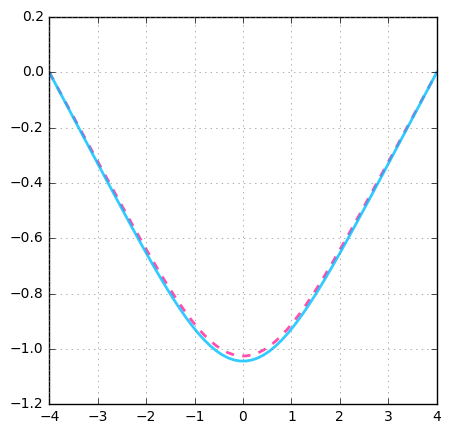

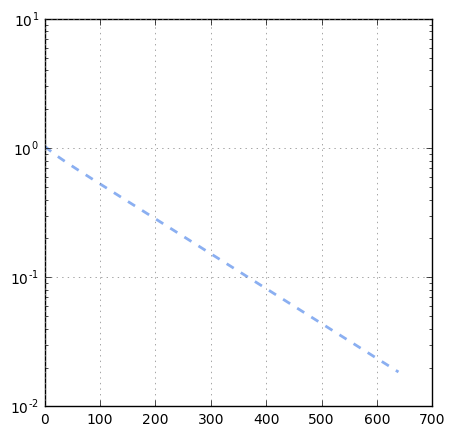

In [55]:
# --------------------/
# domain and boundaries

a, b, m = -4, 4, 64

# --------------------/
# number of iterations

loops = 10*m

# --------------------/
# grid points, mesh
# and other definitions

h = (b - a) / (1.0 + m)
x = np.linspace(a, b, m + 2)

e = np.ones(m + 2)
w = np.zeros(loops)
u = np.zeros(m + 2)[:,None]

# --------------------/
# source 
f = lambda x: 0.25*np.exp(-0.45*x**2)

# inner points
g = f(x)

# boundaries
g[ 0] = 0
g[-1] = 0

# --------------------/
# Toeplitz matrix
A = h**(-2) * spdiags( [e, -2*e, e], [-1, 0, 1], m + 2, m + 2).toarray()

# fit the boundaries
A[0,0], A[0,1] = 1, 0

# fit the boundaries  
A[m + 1, m], A[m + 1,m + 1] = 0, 1

# --------------------/
# matrix algorithm

D = np.diag(np.diag(A)) 
L = D - np.tril(A)    
U = D - np.triu(A)

# --------------------/
# SOR method

omega = 2.0 / (1.0 + np.sin(math.pi * h))
M = omega**(-1) * (D - omega * L)
N = omega**(-1) * ((1.0 - omega)* D + omega * U)

# --------------------/
# exact solution

U = np.asmatrix(A).I * np.asmatrix(g).T

# --------------------/
# approximate solution

for i in range(loops):
    u = MX(M).I * (MX(N) * MX(u) + MX(g).T)
    w[i] = max(abs(u - U))

# --------------------/
# plot outcomes
    
plt.figure(figsize=(5,5))
plt.plot(x, u, color='deeppink', lw=2, ls='--', alpha=0.75)
plt.plot(x, U, color='deepskyblue',lw=2, alpha=0.8)
plt.grid(color='gray',alpha=0.9)
# --------------------/
# plot the error

plt.figure(figsize=(5,5))
plt.semilogy(w, color='cornflowerblue',lw=2, ls='--',alpha=0.75)
plt.grid(color='gray',alpha=1)

# --------------------/
# spectral radius

G = MX(M).I * MX(N)
r = max(abs(linalg.eigvals(G)))

print r

> NB property of [FVNTS](http://www.fvnts.ch/) 